# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# loading of the data

In [2]:
data = pd.read_csv("market_segmentation.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [3]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


# plotting the data

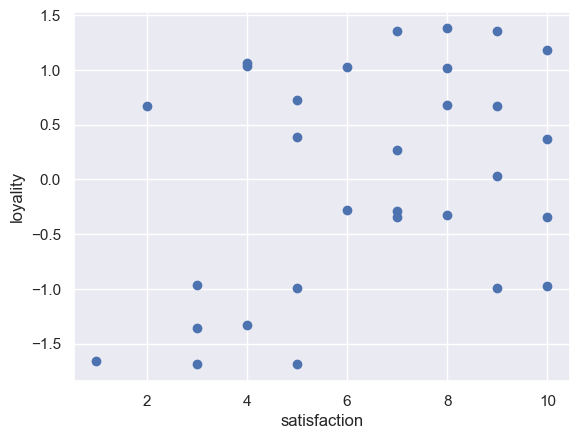

In [4]:
plt.scatter(data["Satisfaction"],data["Loyalty"])
plt.xlabel('satisfaction')
plt.ylabel('loyality')
plt.show()

# select the features

In [5]:
x = data.copy()

# clustering


In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

# clustering the result

In [7]:
cluster = x.copy()
cluster["Cluster"]=kmeans.fit_predict(x)
cluster

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


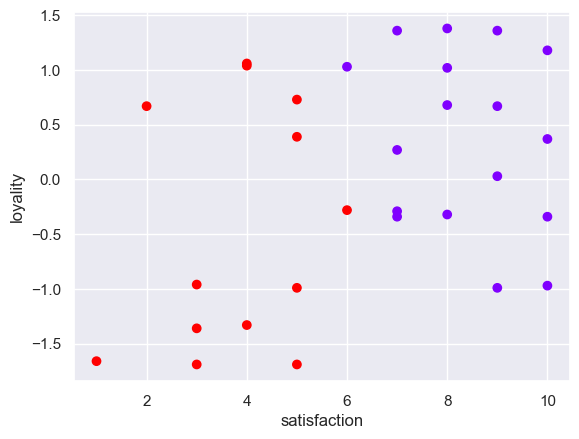

In [8]:
plt.scatter(data["Satisfaction"],data["Loyalty"] , c=cluster["Cluster"],cmap='rainbow')
plt.xlabel('satisfaction')
plt.ylabel('loyality')
plt.show()

# standardizing the variables

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Elbow method

In [12]:
wcss = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.571285077136384,
 5.423830011052964,
 4.380320178840311,
 3.797868137669906]

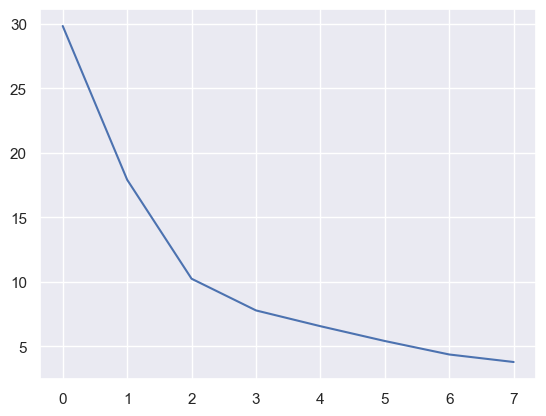

In [13]:
plt.plot(wcss)
plt.show()

# exploring the clustering solutions and  select the cluster

In [16]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred']= kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,2
9,8,0.68,2


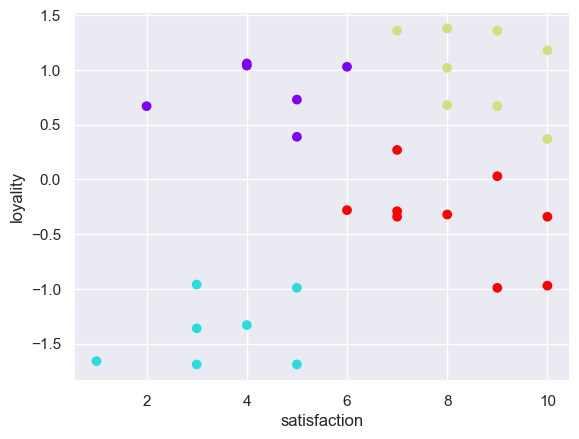

In [17]:
plt.scatter(cluster_new["Satisfaction"],cluster_new["Loyalty"] , c=cluster_new["cluster_pred"],cmap='rainbow')
plt.xlabel('satisfaction')
plt.ylabel('loyality')
plt.show()